# Everyone Turn - 01 - Plotting Query Results  - 👩‍🏫🧑‍🏫

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///./Resources/emoji.sqlite", echo=False)

## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [6]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM emoji LIMIT 10').fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [9]:
# Start a session to query the database
session = Session(engine)

## Query to get the Emoji Data

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [10]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
    order_by(Emoji.score.desc()).all()

Unpack tuples using list comprehensions

In [11]:
# Unpack the "Top 10" `emoji_id` and `scores` from results and save into separate lists.
emoji_id = [result[1] for result in results[:10]]
scores = [int(result[2]) for result in results[:10]]

## Plot using Matplotlib

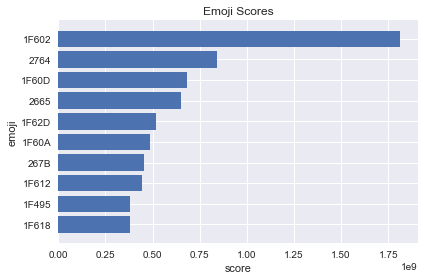

In [12]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax = plt.subplots()
ypos = range(1, len(scores)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel("score")
ax.set_ylabel("emoji")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title("Emoji Scores")
fig.tight_layout()
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [13]:
# Load the results into a Pandas Dataframe. Set the index to the `emoji_id`
df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
df.set_index('emoji_id', inplace=True, )
df.head(10)

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

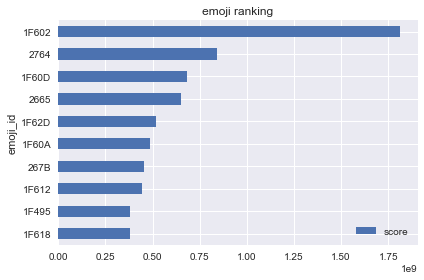

In [14]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.iloc[::-1].plot.barh(title="emoji ranking")
plt.tight_layout()
plt.show()

In [15]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt = session.query(Emoji).\
    order_by(Emoji.score.desc()).statement
df2 = pd.read_sql_query(stmt, session.bind)
df2.head(10)

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
5,6,😊,1F60A,SMILING FACE WITH SMILING EYES,484540701
6,7,♻️,267B,BLACK UNIVERSAL RECYCLING SYMBOL,452489849
7,8,😒,1F612,UNAMUSED FACE,441690175
8,9,💕,1F495,TWO HEARTS,381679908
9,10,😘,1F618,FACE THROWING A KISS,377847645


# Instructor Turn - 02 - First Steps with Flask  - 👩‍🏫🧑‍🏫

```python
# 1. import Flask
from flask import Flask

# 2. Create an app, being sure to pass __name__
app = Flask(__name__)

# 3. Define what to do when a user goes to the index route
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return "Welcome to my 'Home' page!"


# 4. Define what to do when a user goes to the /about route
@app.route("/about")
def about():
    print("Server received request for 'About' page...")
    return "Welcome to my 'About' page!"


if __name__ == "__main__":
    app.run(debug=True)

```

# Instructor Turn  - 03 - Jsonify - 👩‍🏫🧑‍🏫
```python
from flask import Flask, jsonify

app = Flask(__name__)

hello_list = ["Hello", "World!"]
hello_dict = {"Hello": "World!"}

@app.route("/")
def home():
    return "Hi"

@app.route("/normal")
def normal():
    return str(hello_list)

@app.route("/jsonified")
def jsonified_list():
    return jsonify(hello_list)

@app.route("/dict")
def dictionary():
    return hello_dict

if __name__ == "__main__":
    app.run(debug=True)

```

# Everyone - 04 - Hello Web - 👩‍🏫🧑‍🏫

```python
# 1. Import Flask
from flask import Flask

# 2. Create an app
app = Flask(__name__)


# 3. Define index route
@app.route("/")
def index():
    return "Hello, world!"

# 4. Define the about route
@app.route("/about")
def about():
    name = "Peleke"
    location = "Tien Shan"

    return f"My name is {name}, and I live in {location}."

# 5. Define the contact route
@app.route("/contact")
def contact():
    email = "peleke@example.com"

    return f"Questions? Comments? Complaints? Shoot an email to {email}."


# 6. Define main behavior
if __name__ == "__main__":
    app.run(debug=True)

```


# Everyone - 05 - Justice League Jsonify - 👩‍🏫🧑‍🏫

```python
from flask import Flask, jsonify

# Dictionary of Justice League
justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent/Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league"
    )


if __name__ == "__main__":
    app.run(debug=True)
```

# Instructor Turn - 06 - Variable Rule - 👩‍🏫🧑‍🏫



```python
from flask import Flask, jsonify

justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league<br/>"
        f"/api/v1.0/justice-league/Arthur%20Curry<br/>"
        f"/api/v1.0/justice-league/Bruce%20Wayne<br/>"
        f"/api/v1.0/justice-league/Victor%20Stone<br/>"
        f"/api/v1.0/justice-league/Barry%20Allen<br/>"
        f"/api/v1.0/justice-league/Hal%20Jordan<br/>"
        f"/api/v1.0/justice-league/Clark%20Kent%20Kal-El<br/>"
        f"/api/v1.0/justice-league/Princess%20Diana"
    )


@app.route("/api/v1.0/justice-league/<real_name>")
def justice_league_character(real_name):
    """Fetch the Justice League character whose real_name matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = real_name.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["real_name"].replace(" ", "").lower()

        if search_term == canonicalized:
            return character

    return {"error": f"Character with real_name {real_name} not found."}, 404


if __name__ == "__main__":
    app.run(debug=True)

```

# Student Turn  - 07 - Variable Rule


```python
from flask import Flask, jsonify

justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/justice-league")
def justice_league():
    """Return the justice league data as json"""

    return jsonify(justice_league_members)


@app.route("/")
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league<br/>"
        f"/api/v1.0/justice-league/superhero/aquaman<br/>"
        f"/api/v1.0/justice-league/superhero/batman<br/>"
        f"/api/v1.0/justice-league/superhero/cyborg<br/>"
        f"/api/v1.0/justice-league/superhero/flash<br/>"
        f"/api/v1.0/justice-league/superhero/greenlantern<br/>"
        f"/api/v1.0/justice-league/superhero/superman<br/>"
        f"/api/v1.0/justice-league/superhero/wonderwoman"
    )


@app.route("/api/v1.0/justice-league/real_name/<real_name>")
def justice_league_by_real_name(real_name):
    """Fetch the Justice League character whose real_name matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = real_name.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["real_name"].replace(" ", "").lower()

        if search_term == canonicalized:
            return character

    return {"error": f"Character with real_name {real_name} not found."}, 404


@app.route("/api/v1.0/justice-league/superhero/<superhero>")
def justice_league_by_superhero__name(superhero):
    """Fetch the Justice League character whose superhero matches
       the path variable supplied by the user, or a 404 if not."""

    canonicalized = superhero.replace(" ", "").lower()
    for character in justice_league_members:
        search_term = character["superhero"].replace(" ", "").lower()

        if search_term == canonicalized:
            return character

    return {"error": "Character not found."}, 404


if __name__ == "__main__":
    app.run(debug=True)
```


# Instructor Turn - 08 - Flask with ORM - 👩‍🏫🧑‍🏫



```python
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify


#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///titanic.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
Passenger = Base.classes.passenger

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/names<br/>"
        f"/api/v1.0/passengers"
    )


@app.route("/api/v1.0/names")
def names():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all passenger names"""
    # Query all passengers
    results = session.query(Passenger.name).all()

    session.close()

    # Convert list of tuples into normal list
    all_names = list(np.ravel(results))

    return jsonify(all_names)


@app.route("/api/v1.0/passengers")
def passengers():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of passenger data including the name, age, and sex of each passenger"""
    # Query all passengers
    results = session.query(Passenger.name, Passenger.age, Passenger.sex).all()

    session.close()

    # Create a dictionary from the row data and append to a list of all_passengers
    all_passengers = []
    for name, age, sex in results:
        passenger_dict = {}
        passenger_dict["name"] = name
        passenger_dict["age"] = age
        passenger_dict["sex"] = sex
        all_passengers.append(passenger_dict)

    return jsonify(all_passengers)


if __name__ == '__main__':
    app.run(debug=True)

```

# Eveyone - Instructor Turn - 09 - Chinook Db Analysis - 👩‍🏫🧑‍🏫

In [34]:

# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

# Import Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, Table

# Create an engine for the chinook.sqlite database
engine = create_engine("sqlite:///./Resources/chinook.sqlite", echo=False)

# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# Save a reference to the invoices table as `Invoices`
Invoices = Base.classes.invoices

# Save a reference to the invoice_items table as `Items`
Items = Base.classes.invoice_items
# Use the Metadata and Table object to describe the table and columns.

#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

# Create a table object for  the `invoices` and `invoice_items` tables
# use 'autoload' and 'autoload_with' to define the columns from the table. 
Invoices_table = Table('invoices', metadata, autoload=True, autoload_with=engine)
Invoice_items_table = Table('invoice_items', metadata, autoload=True, autoload_with=engine)

# Get the column names using the 'column.keys()' methods on the table object. 
print(Invoices_table.columns.keys())
print(Invoice_items_table.columns.keys())

# Create a database session object
session = Session(engine)

# List all of the countries found in the invoices table
session.query(Invoices.BillingCountry).group_by(Invoices.BillingCountry).all()

# Alternative Solution using `distinct`
# session.query(Invoices.BillingCountry).distinct().all()

# Design a query that lists the invoices totals for each billing country 
# and sort the output in descending order.
session.query(Invoices.BillingCountry, func.sum(Invoices.Total)).\
    group_by(Invoices.BillingCountry).\
    order_by(func.sum(Invoices.Total).desc()).all()

# List all of the Billing Postal Codes for the USA.
results = session.query(Invoices.BillingPostalCode).\
    filter(Invoices.BillingCountry == 'USA').group_by(Invoices.BillingPostalCode).all()
results

# Calculate the Item Totals (sum(UnitPrice * Quantity)) for the USA
session.query(func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == 'USA').scalar()

# Calculate the Item Totals `sum(UnitPrice * Quantity)` for each Billing Postal Code in the USA
# Sort the results in descending order by Total
session.query(Invoices.BillingPostalCode, func.sum(Items.UnitPrice * Items.Quantity)).\
    filter(Invoices.InvoiceId == Items.InvoiceId).\
    filter(Invoices.BillingCountry == 'USA').\
    group_by(Invoices.BillingPostalCode).\
    order_by(func.sum(Items.UnitPrice * Items.Quantity).desc()).all()



['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']
['InvoiceLineId', 'InvoiceId', 'TrackId', 'UnitPrice', 'Quantity']


[('76110', Decimal('47.6200000000')),
 ('60611', Decimal('43.6200000000')),
 ('84102', Decimal('43.6200000000')),
 ('53703', Decimal('42.6200000000')),
 ('94040-111', Decimal('39.6200000000')),
 ('98052-8300', Decimal('39.6200000000')),
 ('32801', Decimal('39.6200000000')),
 ('95014', Decimal('38.6200000000')),
 ('94043-1351', Decimal('37.6200000000')),
 ('89503', Decimal('37.6200000000')),
 ('85719', Decimal('37.6200000000')),
 ('2113', Decimal('37.6200000000')),
 ('10012-2612', Decimal('37.6200000000'))]